# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.
- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
df = pd.read_csv('data/weatherHistory.csv',  low_memory=False)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
from sklearn import linear_model
Y = df['Temperature (C)']
X = df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

In [8]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
predictions = lrm.predict(df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']])

In [9]:
print('Coefficients: \n', lrm.coef_)
print('Intercept (bias): \n', lrm.intercept_)

Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Intercept (bias): 
 37.92643818528534


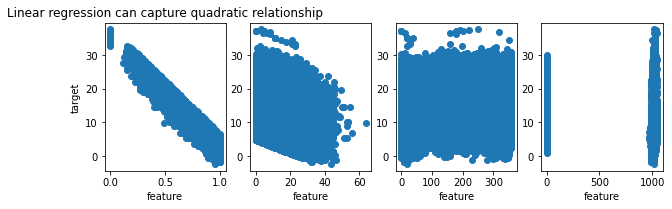

In [10]:
# we plot the estimated Y and X
# the relationship should be quadratic

plt.figure(figsize=(10,6))

plt.subplot(2,4,1)
plt.scatter(df['Humidity'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,4,2)
plt.scatter(df['Wind Speed (km/h)'], predictions)
plt.xlabel("feature")

plt.subplot(2,4,3)
plt.scatter(df['Wind Bearing (degrees)'], predictions)
plt.xlabel("feature")

plt.subplot(2,4,4)
plt.scatter(df['Pressure (millibars)'], predictions)
plt.xlabel("feature")
plt.show()

In [11]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.9429698425396953e-15


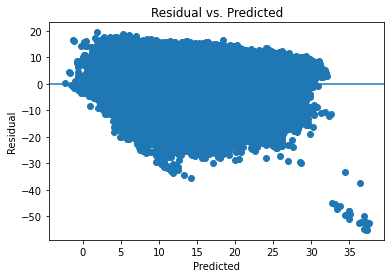

In [12]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [13]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


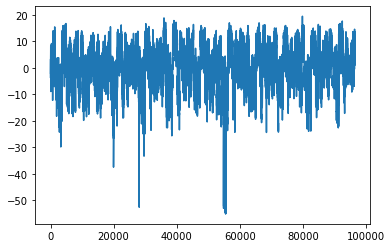

In [14]:
plt.plot(errors)
plt.show()


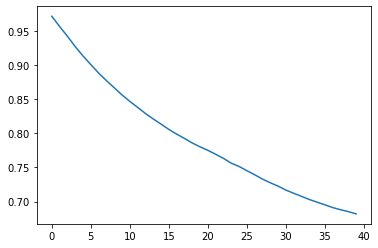

In [15]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

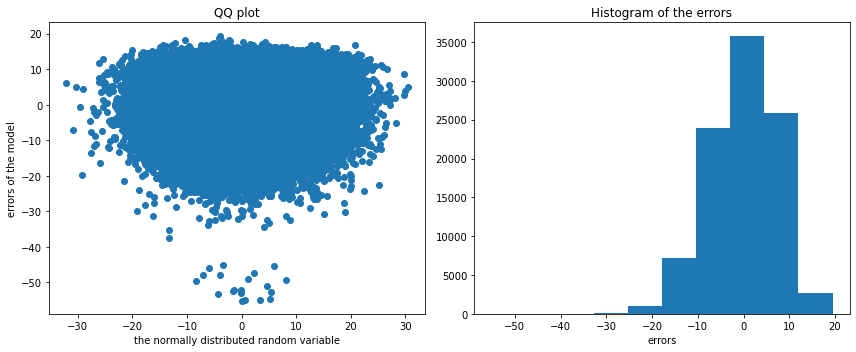

In [16]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [18]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252351 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

https://github.com/FurkanSrtc/PythonExams/blob/master/Assignments%20for%20Regression_Problems/A_02_simple_linear_regression_models.ipynb